0. Import the data and declare your package dependencies.

Import the avocado-updated-2020csv dataset.

In [49]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, geom_bar, coord_flip, geom_col, facet_wrap, theme_light, scale_y_continuous, scale_fill_manual, ggplot, aes, geom_point, labs, theme_light

avocado = pd.read_csv("avocado-updated-2020.csv")

avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


1. Briefly describe the data set. What information does it contain?



The dataset encompasses data related to avocado sales, with each row representing sales information for a specific date. It comprises variables such as the average price, total sales volume, detailed breakdowns of SKU numbers, the total quantity of bags along with classifications based on their sizes, the avocado type (either conventional or organic), the year of sale, and the geographical location of the sales.

The dataset consists of 33,045 rows and 13 columns in total.


2. Clean the data in any way you see fit.

In [50]:
# Checking what values for 'geography'
avocado["geography"].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

Q How many distinct geographical regions are there? Can you categorize them into different types of geographical regions (e.g. major regions, metro regions, etc.)? Will you create a new variable for this? A new data set for each?



  Major geographical regions included are California, Great Lakes, Midsouth, Northeast, Plains, South Central, Southeast, and West.

  Major metropolitan regions consist of Baltimore/Washington, Buffalo/Rochester, Cincinnati/Dayton, Dallas/Ft. Worth, Harrisburg/Scranton, Hartford/Springfield, Miami/Ft. Lauderdale, New Orleans/Mobile, Northern New England, Raleigh/Greensboro, Richmond/Norfolk, South Dakota, and West Tex/New Mexico.

  California and South Dakota are the only states.
  
  California is categorized as a major region. In contrast, South Dakota, with a land area akin to the metropolitan regions, is classified as a metropolitan region. The dataset designates the entire United States as 'Country' under the variable 'RegionType'.

Q You may also want to consider renaming variables so they make sense intuitively. For example, what does 4046 mean in terms of the size of avocados?

Small to Medium Hass Avocado (roughly 3-5 ounces) is represented by the SKU number #4046.

Large Hass Avocado (roughly 8-10 ounces) is identified by the SKU number #4225.

Extra Large Hass Avocado (roughly 10-15 ounces) is associated with the SKU number #4770.

https://californiaavocado.com/avocado101/avocado-varieties/

In [51]:
# Check for missing values:
missing_values = avocado.isnull().sum()

# To drop rows with any missing values:
avocado = avocado.dropna()
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [52]:
# Melting the avocado sizes into a column 'size'
avocado_melt = avocado.melt(id_vars=[col for col in avocado.columns if col not in ["4046", "4225", "4770"]],
                                  value_vars=["4046", "4225", "4770"],
                                  var_name = "SKU",
                                  value_name = "count")

size_mapping = {"4046": "small", "4225": "large", "4770": "xlarge"}

avocado_melt["size"] = avocado_melt["SKU"].map(size_mapping)

avocado_melt

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99130,2020-11-29,1.47,1583056.27,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,4770,2617.17,xlarge
99131,2020-11-29,0.91,5811114.22,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,4770,19741.90,xlarge
99132,2020-11-29,1.48,289961.27,256709.92,122606.21,134103.71,0.00,organic,2020,West,4770,636.51,xlarge
99133,2020-11-29,0.67,822818.75,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,4770,10543.63,xlarge


In [53]:
# Defining the major and metro regions
Major_regions = ["California", "Great Lakes", "Midsouth", "Northeast", "Plains", "South Central", "Southeast", "West"]
Metro_regions = ["Baltimore/Washington", "Buffalo/Rochester", "Cincinnati/Dayton", "Dallas/Ft. Worth", "Harrisburg/Scranton", "Hartford/Springfield", "Miami/Ft. Lauderdale", "New Orleans/Mobile", "Northern New England", "Raleigh/Greensboro", "Richmond/Norfolk", "South Dakota", "West Tex/New Mexico"]


# Defining the category conditions
conditions = [
    avocado_melt["geography"].isin(Major_regions),
    avocado_melt["geography"].isin(Metro_regions),
    avocado_melt["geography"] == 'Total U.S.',
    (avocado_melt["geography"] != "Total U.S.") & (~avocado_melt["geography"].isin(Major_regions)) & (~avocado_melt["geography"].isin(Metro_regions))
]

# Defining the category names matching the conditions
categories = [
    "Major Region",
    "Metro Region",
    "Country",
    "City"
]

# Assigning categories based on conditions
avocado_melt["RegionType"] = np.select(conditions, categories, default=None)

avocado_melt

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small,City
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small,City
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small,City
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small,City
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small,Metro Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99130,2020-11-29,1.47,1583056.27,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,4770,2617.17,xlarge,Country
99131,2020-11-29,0.91,5811114.22,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,4770,19741.90,xlarge,Major Region
99132,2020-11-29,1.48,289961.27,256709.92,122606.21,134103.71,0.00,organic,2020,West,4770,636.51,xlarge,Major Region
99133,2020-11-29,0.67,822818.75,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,4770,10543.63,xlarge,Metro Region


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [54]:
# Given major regions
Major_regions = ["California", "Great Lakes", "Midsouth", "Northeast", "Plains", "South Central", "Southeast", "West"]

# Filtering the data for 2017, organic type, and major regions
organic_small_2017_major = avocado_melt[
    (avocado_melt["year"] == 2017) &
    (avocado_melt["type"] == "organic") &
    (avocado_melt["geography"].isin(Major_regions))
]

# Grouping by major regions and summing the total volume of small Hass avocados
total_volume_by_major_region = organic_small_2017_major.groupby("geography")["total_volume"].sum().reset_index()

# Identifying the major region with the highest total volume
major_region_highest_volume = total_volume_by_major_region.sort_values(by="total_volume", ascending=False).head(1)

major_region_highest_volume

,geography,total_volume
7,West,36725537.37


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [55]:
# Extracting date time
avocado_melt["date"] = pd.to_datetime(avocado_melt["date"])

# Extracting month
avocado_melt["month"] = avocado_melt["date"].dt.month

avocado_melt["month_name"] = avocado_melt["date"].dt.strftime("%B") # had to look for the month function

# Extracting day
avocado_melt["day"] = avocado_melt["date"].dt.day

# Extracting year
avocado_melt["year"] = avocado_melt["date"].dt.year

# Grouping by month to get the average total volume for each month
avg_volume_per_month = avocado_melt.groupby("month_name")["total_volume"].mean().reset_index()

# Sorting to get the month with the highest average total volume
top_month = avg_volume_per_month.sort_values("total_volume", ascending=False).head(1)

top_month


,month_name,total_volume
8,May,1.123632e+06


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

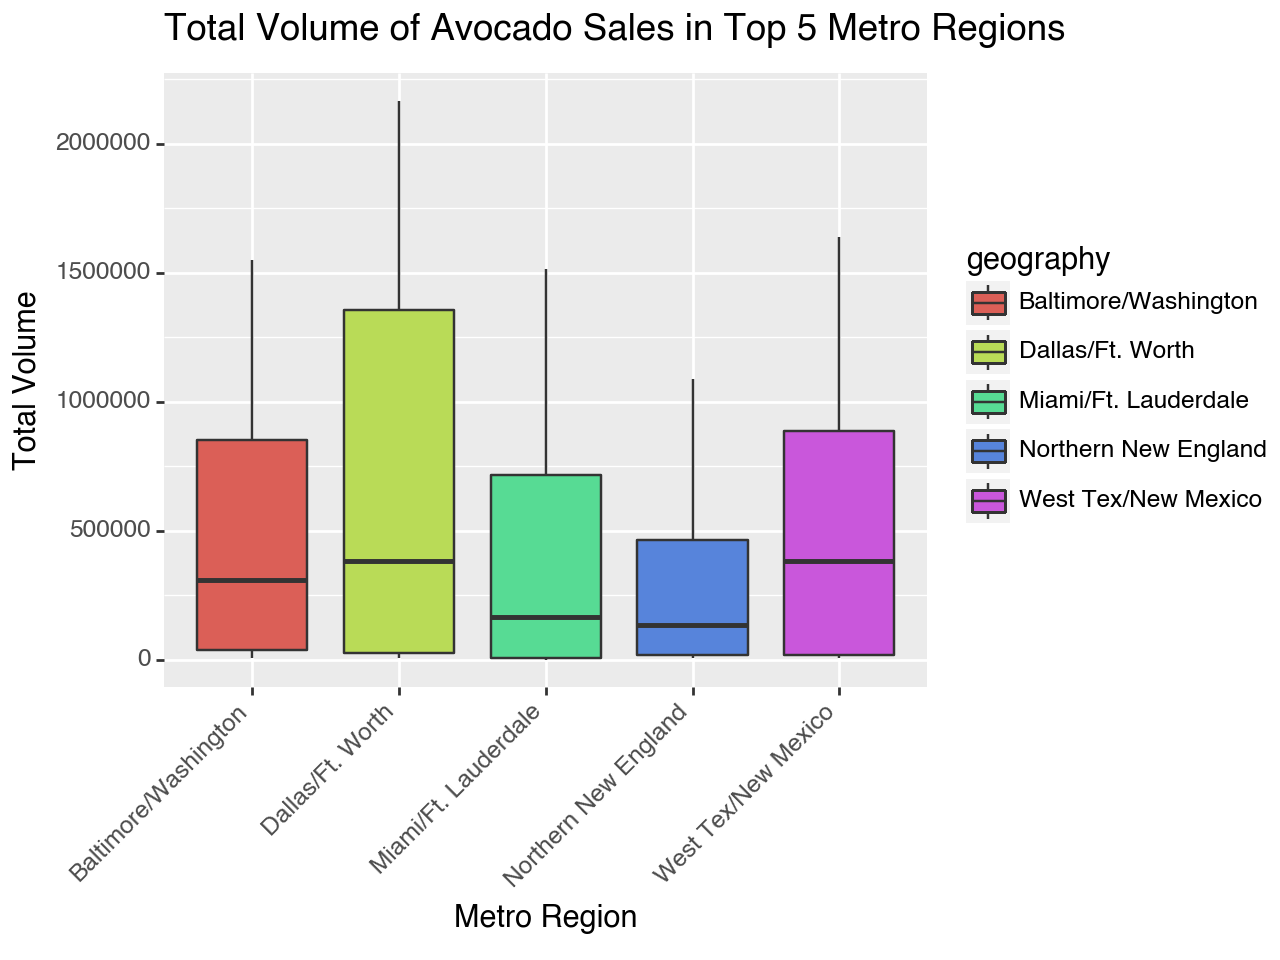

<Figure Size: (640 x 480)>

In [56]:

# Given metro regions
Metro_regions = [
    "Baltimore/Washington", "Buffalo/Rochester", "Cincinnati/Dayton",
    "Dallas/Ft. Worth", "Harrisburg/Scranton", "Hartford/Springfield",
    "Miami/Ft. Lauderdale", "New Orleans/Mobile", "Northern New England",
    "Raleigh/Greensboro", "Richmond/Norfolk", "South Dakota",
    "West Tex/New Mexico"
]

# Filter the data for metro areas
metro_data = avocado_melt[avocado_melt["geography"].isin(Metro_regions)]

# Calculate the average total volume for each metro area
average_volume_metro = metro_data.groupby("geography")["total_volume"].mean().reset_index()

# Identify the top 5 metro areas with the highest average total volume
top_5_metro = average_volume_metro.nlargest(5, "total_volume")

# Filter the data for the top 5 metro areas
top_5_metro_data = metro_data[metro_data["geography"].isin(top_5_metro["geography"])]

# Create the boxplot using plotnine (ggplot)
(
    ggplot(top_5_metro_data, aes(x = "geography", y = "total_volume", fill = "geography")) +
    geom_boxplot() +
    labs(title = "Total Volume of Avocado Sales in Top 5 Metro Regions",
         x = "Metro Region",
         y = "Total Volume") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)


6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [57]:
# Filtering the dataset for specific California regions and calculating the average price
california_regions = [
    "Los Angeles",
    "Sacramento",
    "San Diego",
    "San Francisco"
]
# Filtering the dataset for California regions
california_4regions = avocado_melt[avocado_melt["geography"].isin(california_regions)]
california_4regions

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType,month,month_name,day
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,4046,1837999.65,small,City,1,January,4
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,4046,47721.51,small,City,1,January,4
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,4046,110693.69,small,City,1,January,4
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,4046,3727.52,small,City,1,January,4
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,4046,244152.26,small,City,1,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99108,2020-11-29,1.43,23531.38,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,4770,0.00,xlarge,City,11,November,29
99109,2020-11-29,1.12,469356.72,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,4770,7210.47,xlarge,City,11,November,29
99110,2020-11-29,1.95,25799.95,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,4770,0.00,xlarge,City,11,November,29
99111,2020-11-29,1.50,644141.37,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,4770,5597.21,xlarge,City,11,November,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.



       geography          type  count      mean       std   min   25%    50%  \
0    Los Angeles  conventional  918.0  1.047124  0.230915  0.53  0.89  1.020   
1    Los Angeles       organic  918.0  1.574902  0.311382  0.96  1.34  1.585   
2     Sacramento  conventional  918.0  1.295359  0.218938  0.86  1.13  1.260   
3     Sacramento       organic  918.0  1.873856  0.292556  1.13  1.67  1.840   
4      San Diego  conventional  918.0  1.113856  0.242695  0.61  0.94  1.090   
5      San Diego       organic  918.0  1.798366  0.331294  1.05  1.55  1.800   
6  San Francisco  conventional  918.0  1.400490  0.271763  0.84  1.22  1.390   
7  San Francisco       organic  918.0  2.119444  0.395422  1.06  1.90  2.060   

    75%   max  
0  1.15  1.80  
1  1.75  2.44  
2  1.43  1.89  
3  2.05  2.82  
4  1.22  1.83  
5  2.00  2.78  
6  1.57  2.20  
7  2.36  3.25  
type      geography  price_difference
0     San Francisco          0.718954
1         San Diego          0.684510
2        Sacramento  

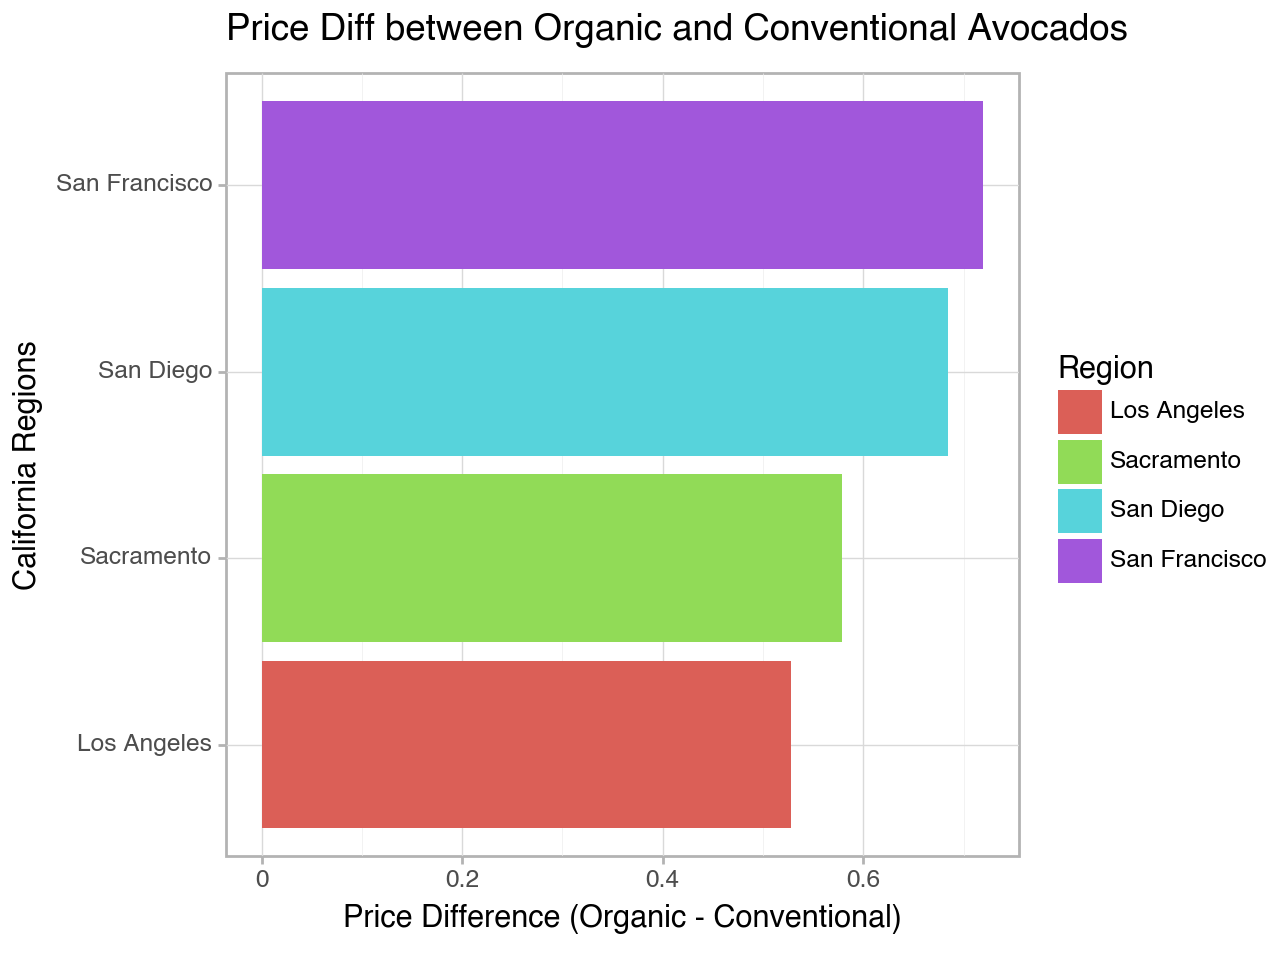

<Figure Size: (640 x 480)>

In [58]:
# Filter the data for California regions and for organic and conventional types
california_data = avocado_melt[
    (avocado_melt["geography"].isin(california_regions)) &
    (avocado_melt["type"].isin(["organic", "conventional"]))
]

# Calculate the average price for each type in each California region
avg_price_by_type_and_region = california_data.groupby(["geography", "type"])["average_price"].mean().reset_index()

# Pivot the data to have types as columns to calculate the price difference
pivot_table = avg_price_by_type_and_region.pivot(index = "geography", columns = "type", values = "average_price")

# Calculate the price difference between organic and conventional avocados
pivot_table["price_difference"] = pivot_table["organic"] - pivot_table["conventional"]

desc_stats = california_4regions.groupby(["geography", "type"])["average_price"].describe().reset_index()
print(desc_stats)

# Sorting the regions by price difference
pivot_table = pivot_table.sort_values(by = "price_difference", ascending=False).reset_index()

# Print the summary statistics
print(pivot_table[["geography", "price_difference"]])

# Plotting the price difference using ggplot (plotnine)
(
    ggplot(pivot_table, aes(x = "geography", y = "price_difference", fill="geography")) +
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(
        title="Price Diff between Organic and Conventional Avocados",
         x = "California Regions",
        y="Price Difference (Organic - Conventional)",
        fill = "Region"
    ) +
    theme_light()
)


The disparity in the average price between conventional and organic avocados is most pronounced in San Francisco, with a difference of 0.72, closely followed by San Diego at 0.68.

In contrast, Los Angeles and Sacramento exhibit smaller price gaps, recorded at 0.53 and 0.58, respectively.

A detailed examination of individual prices reveals that San Francisco not only boasts the highest average organic price at 2.12 but also the maximum price at 3.25, complemented by a standard deviation of 0.40.

The bar graph further illustrates these findings, underscoring the notable price variance between the two types of avocados in San Francisco.

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

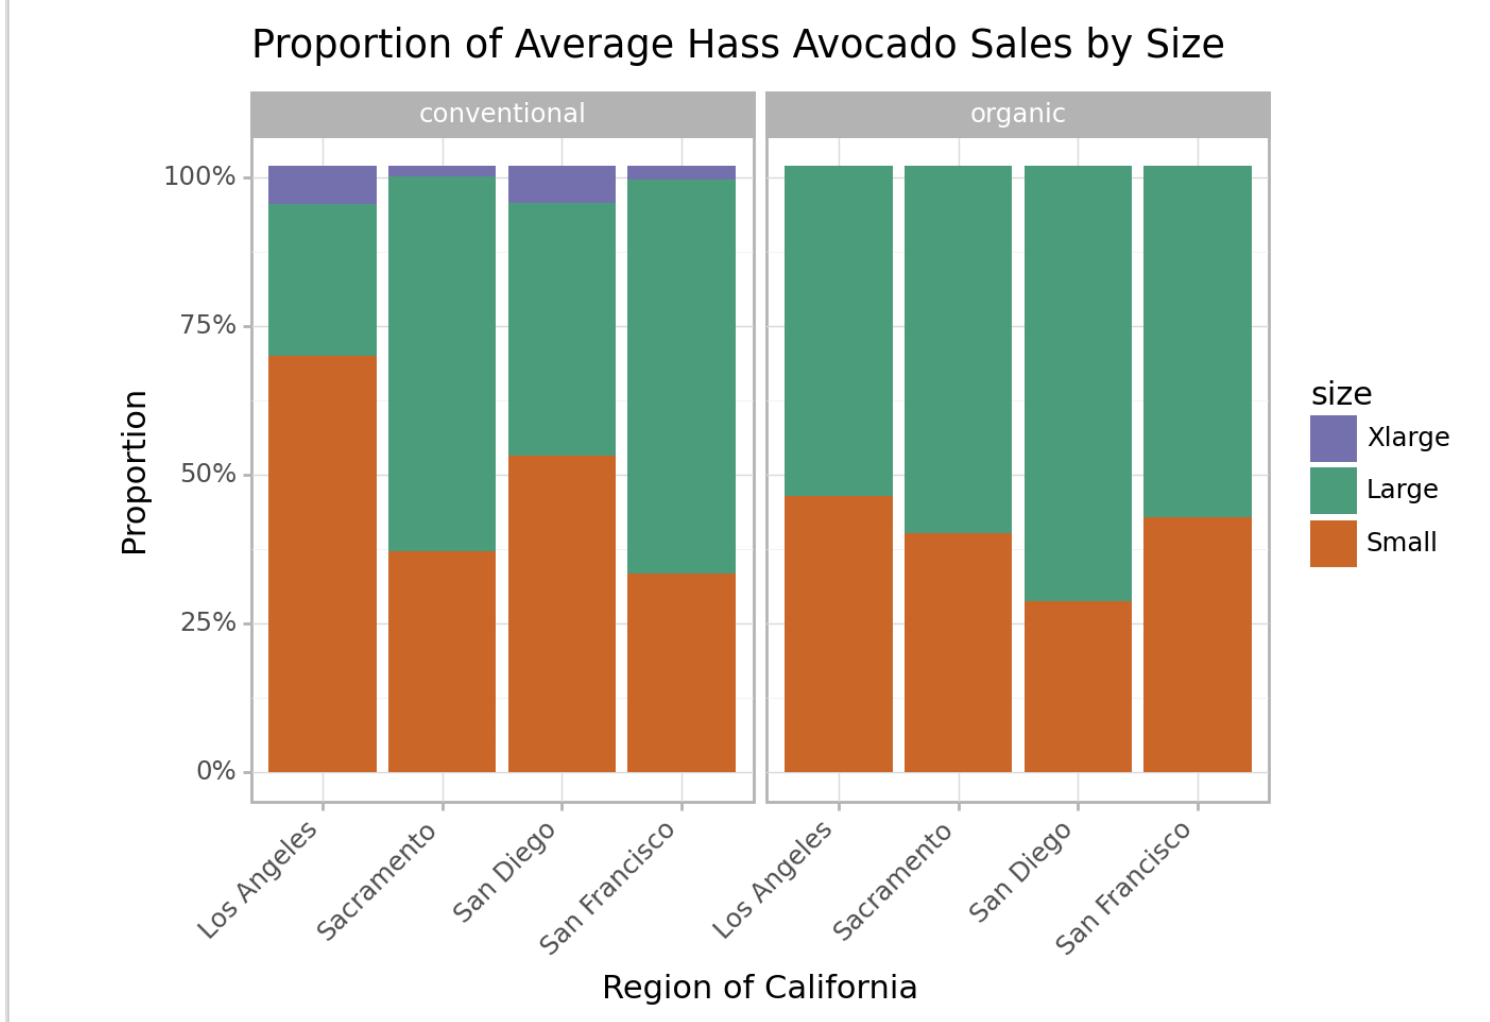

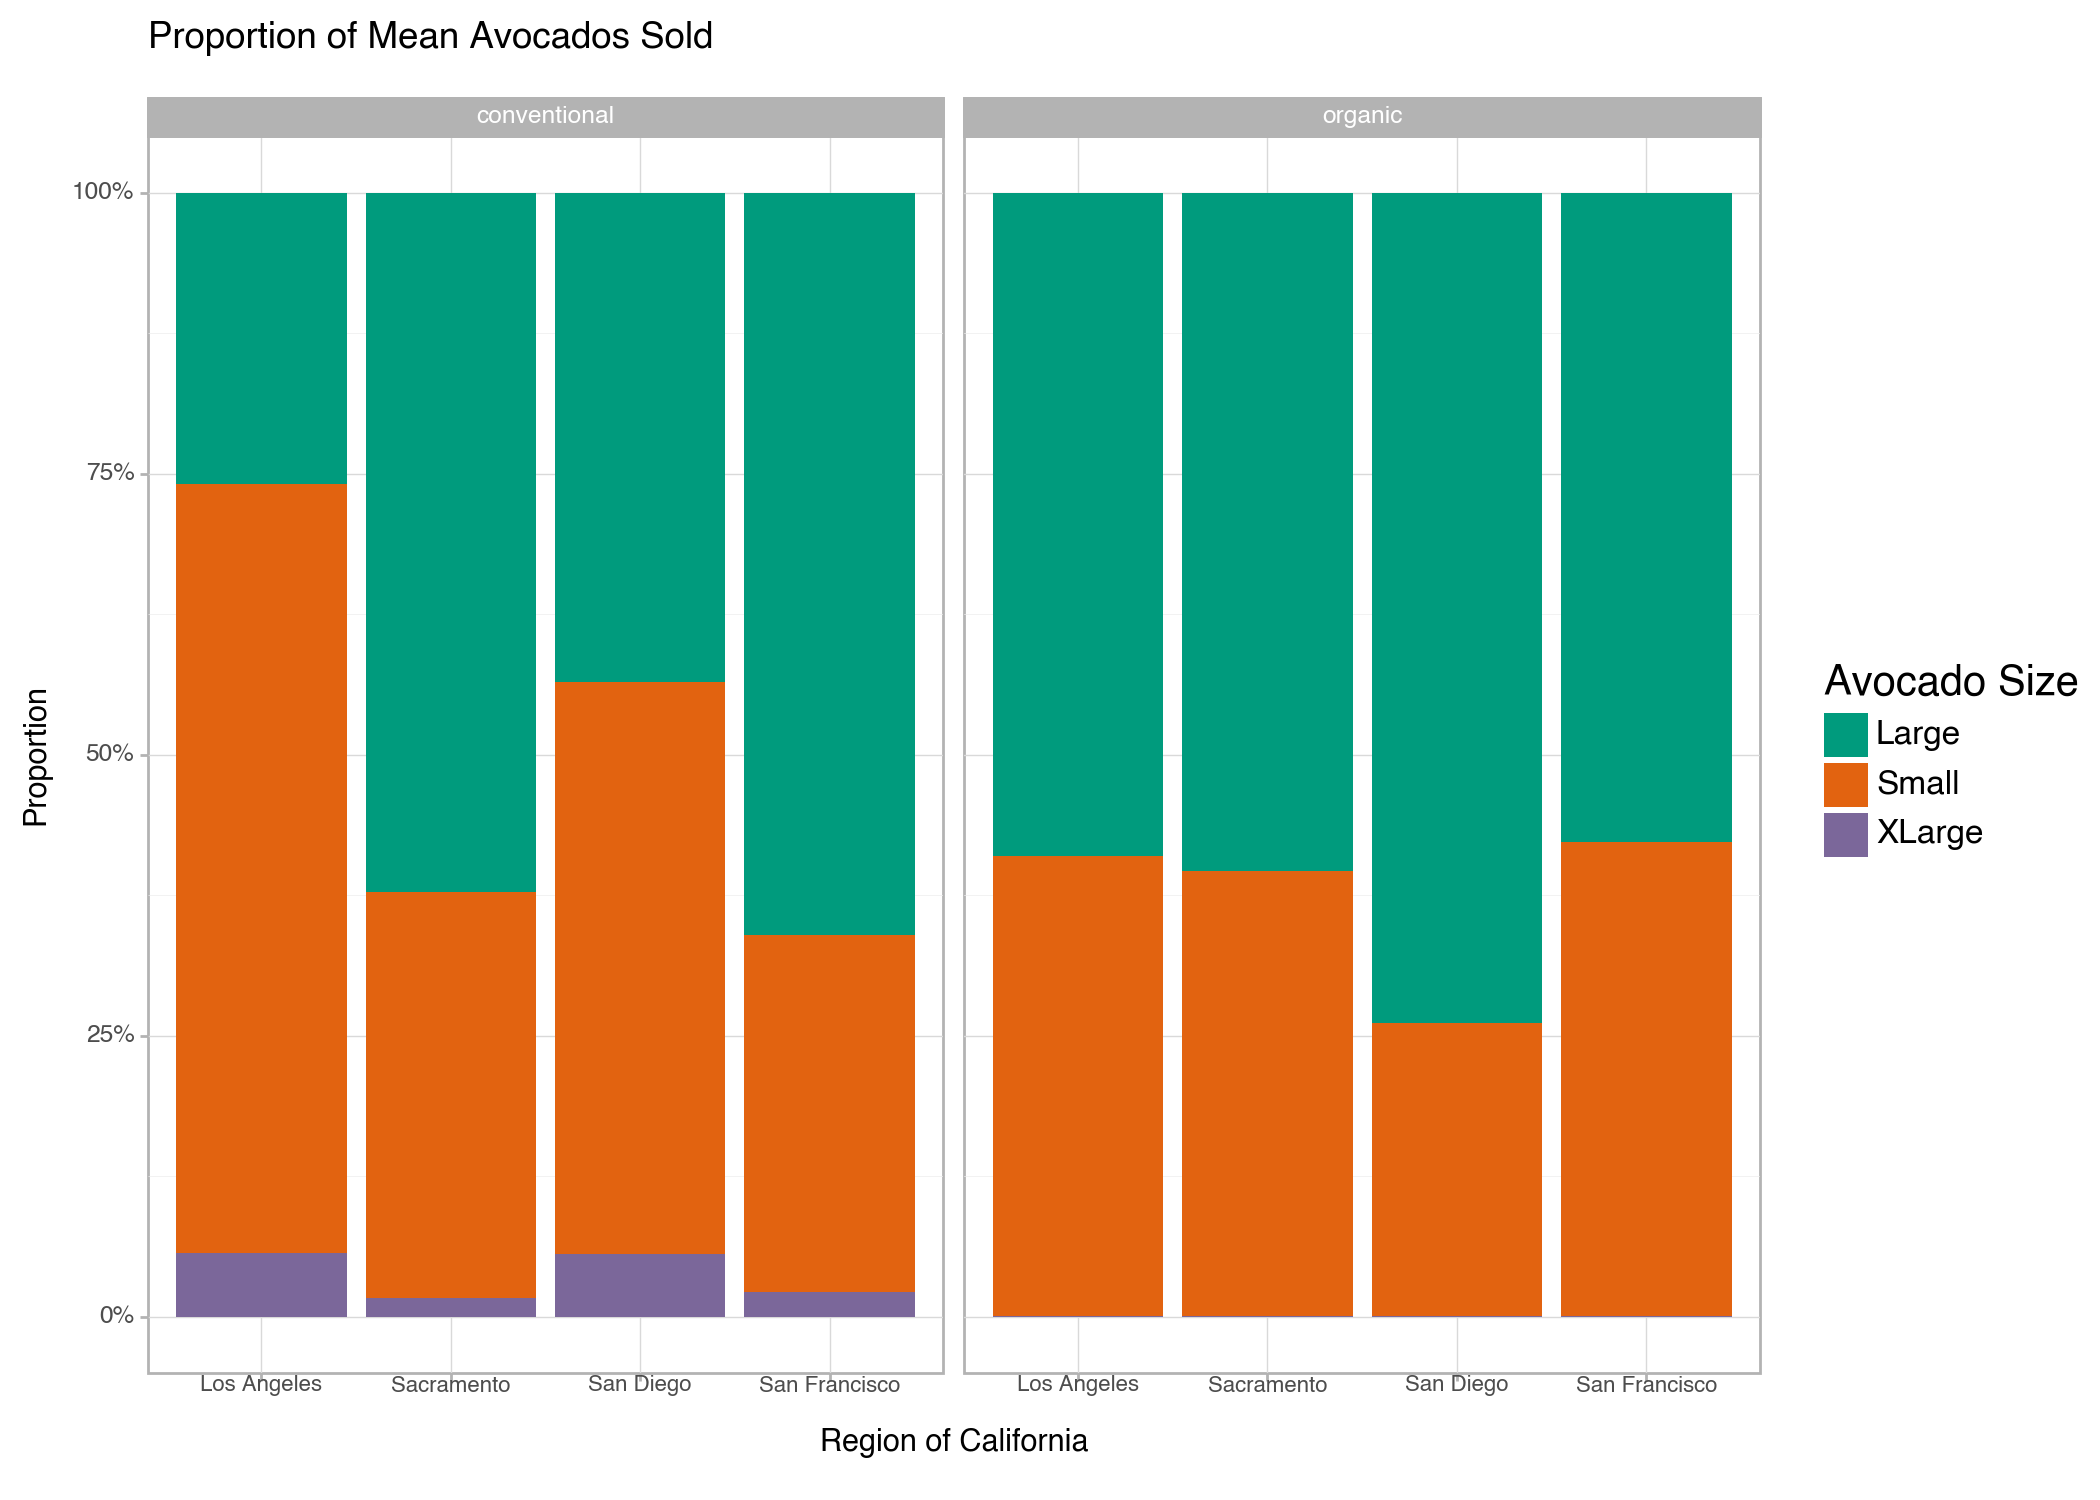

<Figure Size: (1050 x 750)>

In [59]:
# Calculating the average sales
avg_sales = california_4regions.groupby(["geography", "type", "size"])["count"].mean().reset_index()

# Calculating the total sales per region and type to find proportions
total_sales = avg_sales.groupby(["geography", "type"])["count"].sum().reset_index()
total_sales.rename(columns={"count": "total_sales"}, inplace=True)

# Merging the total sales back to the average sales
avg_sales = pd.merge(avg_sales, total_sales, on=["geography", "type"])

# Calculating the proportions
avg_sales["proportion"] = avg_sales["count"] / avg_sales["total_sales"] * 100

# Plotting
plot = (
    ggplot(avg_sales, aes(x = "geography", y = "proportion", fill= "size"))
    + geom_col(stat = "identity", position="stack")
    + facet_wrap("~ type")
    + labs(title="Proportion of Mean Avocados Sold",
           x="Region of California",
           y="Proportion",
           fill="Avocado Size")
    + theme_light()
    + scale_y_continuous(labels=lambda l: ["%d%%" % v for v in l], limits=(0, 100), breaks=range(0, 101, 25))
    + scale_fill_manual(values=["#009b7d", "#e26310", "#7b679a"],
                        labels={"xlarge": "XLarge","large": "Large", "small": "Small"})
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, vjust=0.5, size=8),
            legend_title=element_text(size=15),
            legend_text=element_text(size=12))
    + theme(figure_size=(10.5, 7.5))
)
plot

# Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [63]:
import pandas as pd
import numpy as mp


houses = pd.read_csv("MedianHomePrices.csv")

In [64]:
# Melting the columns into a new column called 'geography' and keeping values in a new column 'MedianPrice', keeping the 'date' column as index
houses_melt = pd.melt(houses,
                  id_vars=['date'],
                  value_vars=['CA', 'Alameda', 'Amador', 'Butte', 'Calaveras', 'Contra-Costa',
                              'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Kern',
                              'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin',
                              'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa',
                              'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
                              'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
                              'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
                              'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
                              'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare',
                              'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Unnamed: 54', 'Condo',
                              'LA Metro', 'Central Coast', 'Central Valley', 'Far North',
                              'Inland Empire', 'S.F. Bay Area', 'SoCal'],
                  var_name='geography',
                  value_name='MedianPrice')
houses_melt

,date,geography,MedianPrice
0,1/1/90,CA,"$194,952"
1,2/1/90,CA,"$196,273"
2,3/1/90,CA,"$194,856"
3,4/1/90,CA,"$196,111"
4,5/1/90,CA,"$195,281"
...,...,...,...
25043,4/1/23,SoCal,"$785,000"
25044,5/1/23,SoCal,"$800,000"
25045,6/1/23,SoCal,"$815,000"
25046,7/1/23,SoCal,"$830,000"


In [65]:
# Merging the dataframes on 'geography'
Houses_avocado = pd.merge(houses_melt,california_4regions, on=["geography"], how = "right")

print(Houses_avocado.head())

   date_x    geography MedianPrice     date_y  average_price  total_volume  \
0  1/1/90  Los Angeles   $215,338  2015-01-04           0.85    2682159.95   
1  2/1/90  Los Angeles   $208,399  2015-01-04           0.85    2682159.95   
2  3/1/90  Los Angeles   $208,135  2015-01-04           0.85    2682159.95   
3  4/1/90  Los Angeles   $219,004  2015-01-04           0.85    2682159.95   
4  5/1/90  Los Angeles   $209,065  2015-01-04           0.85    2682159.95   

   total_bags  small_bags  large_bags  xlarge_bags          type  year   SKU  \
0   255504.05    215571.8    36981.72      2950.53  conventional  2015  4046   
1   255504.05    215571.8    36981.72      2950.53  conventional  2015  4046   
2   255504.05    215571.8    36981.72      2950.53  conventional  2015  4046   
3   255504.05    215571.8    36981.72      2950.53  conventional  2015  4046   
4   255504.05    215571.8    36981.72      2950.53  conventional  2015  4046   

        count   size RegionType  month month_name 

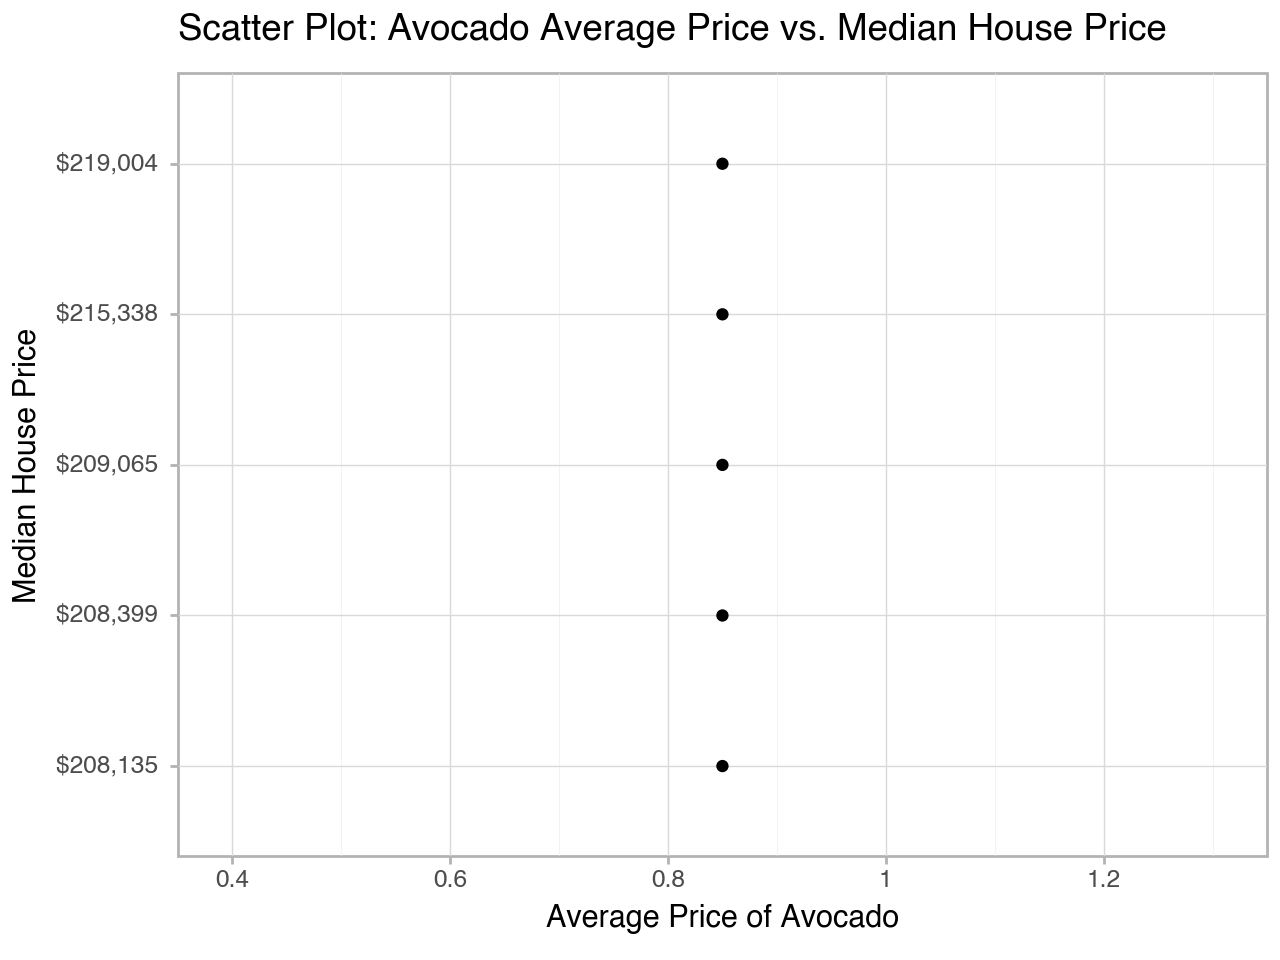

In [66]:
from plotnine import ggplot, aes, geom_point, labs, theme_light

# Create a scatter plot with a light theme
scatter_plot = (
    ggplot(Houses_avocado.head(), aes(x = "average_price", y = "MedianPrice")) +
    geom_point() +
    labs(
        title = "Scatter Plot: Avocado Average Price vs. Median House Price",
        x = "Average Price of Avocado",
        y = "Median House Price"
    ) +
    theme_light()  # Use a light theme
)
print(scatter_plot)

Based on a preliminary analysis of the scatter plot, it is evident that the median house prices in Los Angeles remained relatively stable over the years, with an approximate value of 212,000. In contrast, the avocado prices are depicted as an average figure, which stands at 0.85.